In [1]:
#Importing the necessary packages
import apogee.tools.read as apread
import apogee.spec.plot as splot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Lambda = splot.apStarWavegrid()

# ApVisit Files

Bovy says the first input is location id....ITS NOT!! It is, in fact, the plate id.

In [86]:
import apogee.tools.read as apread
spec = apread.apVisit(6218,56168,148, ext=1, header=False)
specerr = apread.apVisit(6218,56168,148, ext=2, header=False)
wave = apread.apVisit(6218,56168,148, ext=4, header=False)
header2 = apread.apVisit(6218,56168,148, ext=1, header=True)

In [25]:
from apogee.spec import continuum
cont = continuum.fitApvisit(spec, specerr, wave)
specnorm = spec/cont

In [110]:
len(wave)

12288

In [111]:
len(spec)

12288

In [2]:
header2 = apread.apVisit(6218,56168,148, ext=0, header=True)

ValueError: CONTINUE not supported

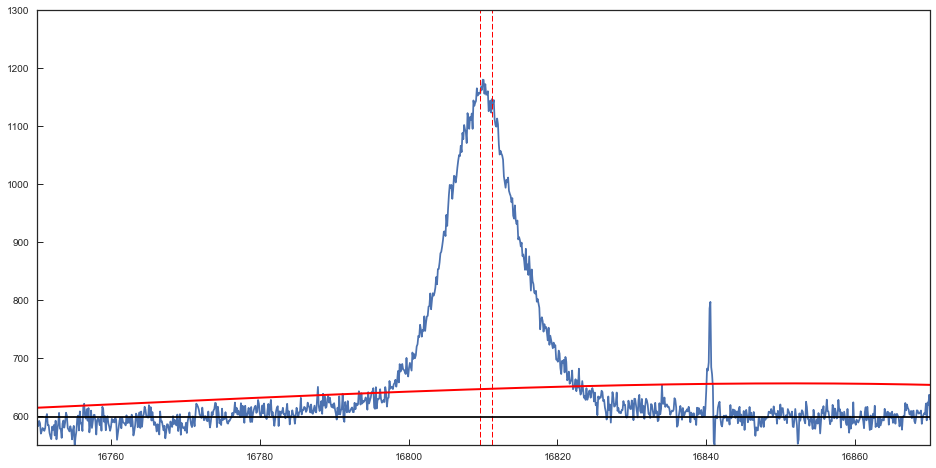

In [101]:
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(wave, spec)
plt.plot(wave, cont, lw=2, color='r')
plt.axvline(16811.179,linewidth = 1,ls = 'dashed', color = 'red')
plt.axvline(16809.609,linewidth = 1,ls = 'dashed', color = 'red')
plt.axhline(598,color='black')
plt.xlim(16750,16870)
plt.ylim(550,1300)
plt.show()

472.223


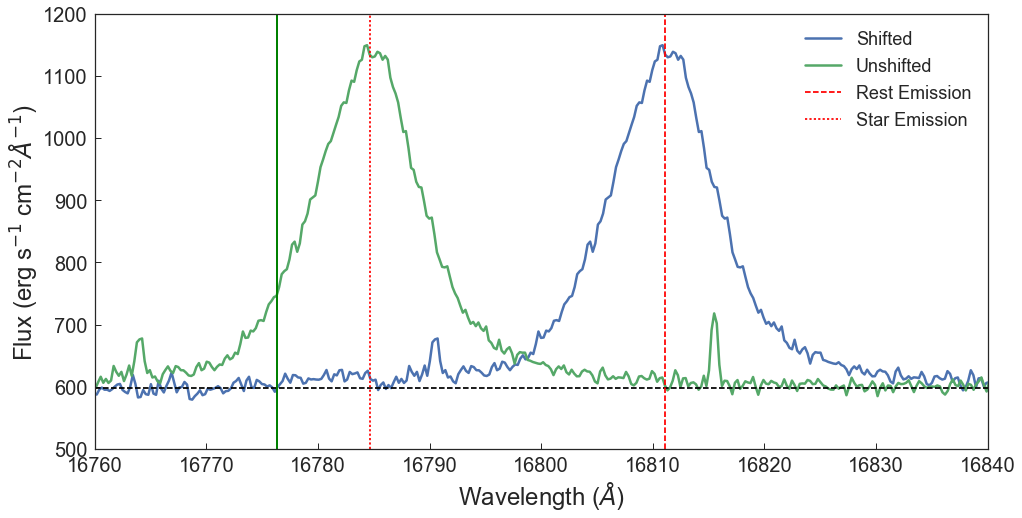

In [94]:
Brackett_EqW_Plot(4586,'2M03434449+3143092',11,16760,16840,500,1200)
#plt.xlim(16750,16870)

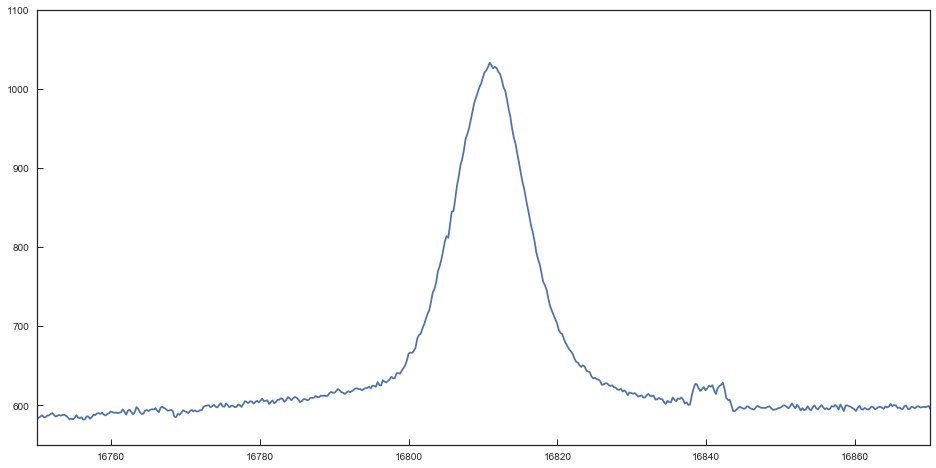

In [69]:
fig,ax = plt.subplots(figsize=(16,8))
plt.xlim(16750,16870)
plt.ylim(550,1100)
#plt.savefig('test.png',dpi=100)
sspec=0
for i in range(16):
    spec2 = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[i+2]
    sspec += spec2
plt.plot(Lambda+26.48,sspec/16)

In [73]:
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
spec1 = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[3]

    
vhelio = header[1]['VHELIO']


n = (11.)**2 #Beginning electron level
c = 299792.458 #Speed of light (km/s)
rydberg_inf =  1.0973731568539*(10**7) #Rydberg constant (m^-1)
electron = 9.10938356*(10**-31) #Mass of electron (kg)
nucleus = 1.672621898*(10**-27) #Mass of hydrogen nucleus (kg)
    
rydberg_red = rydberg_inf/(1+(electron/nucleus)) #Reduced mass Rydberg constant (m^-1)
rest_wavelength1 = rydberg_red*((1./16.)-(1./n)) #(m^-1)
rest_wavelength = 1/rest_wavelength1 #wavelength (m)

observed_wavelength1 = rest_wavelength*(1-(vhelio/c)) #Finding the location of the peak of the observed spectrum
observed_wavelength = observed_wavelength1*(10**10)
shift = (rest_wavelength-observed_wavelength1)*(10**10) #Finding the difference between rest and observed wavelengths

#Generic continuum lines 45 elements wide (~9 Angstroms)

centerline = find_nearest(Lambda,observed_wavelength) #Finds the closest element of Lambda for our observed peak

L1 = centerline - 240
L2 = centerline - 150
R1 = centerline + 150
R2 = centerline + 240
            
#Equivalent Width Calculation

Fluxcontinuum = (np.sum(spec1[L1:L2])+np.sum(spec1[R1:R2])) / (len(spec1[L1:L2])+len(spec1[R1:R2]))
rest_wavelength*(10**10)

16811.179336200967

In [55]:
Lambda[centerline]-Lambda[R2]

-55.745572469953913

In [56]:
Lambda[centerline]-Lambda[L2]

34.747236951334344

In [89]:
16811.179/(1+(28/299792.458))

16809.609017033727

In [ ]:
spectest2 = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
spectest2 #I suppressed the output here as it was really longo

In [63]:
spec = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[3]
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
spectest2 = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[3]

In [86]:
header

(None, 
 SIMPLE  =                    T /image conforms to FITS standard
 BITPIX  =                   16 /bits per data value
 NAXIS   =                    0 /number of axes
 EXTEND  =                    T /file may contain extensions
 DATE    = '2016-01-26'         / Creation UTC (CCCC-MM-DD) date of FITS header
 COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy
 COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H
 OBJID   = '2M03434449+3143092' / Object ID
 J       =              12.3230 / 2MASS J magnitude
 H       =              10.7850 / 2MASS H magnitude
 K       =              9.53800 / 2MASS Ks magnitude
 TARG1   =          -2147352576 / First APOGEE targeting flag (bitwise, see docs)
 TARG2   =          -2147475456 / Second APOGEE targeting flag (bitwise, see docs
 TARG3   =                    0 / Third APOGEE targeting flag (bitwise, see docs)
 SURVEY  = 'apogee  '           / Survey name (for targeting flags)
 TELESCOP= '

In [92]:
visit = header[1]['NVISITS']
vhelio = header[1]['VHELIO']
BC = header[1]['BC1']

(500, 1200)

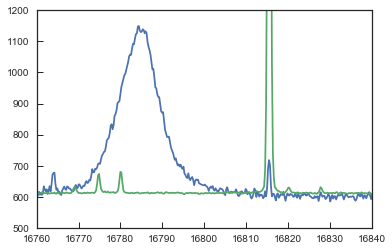

In [44]:
plt.plot(Lambda,spec)
plt.plot(Lambda,spectest2+600)
plt.xlim(16760,16840)
plt.ylim(500,1200)

(0, 6700)

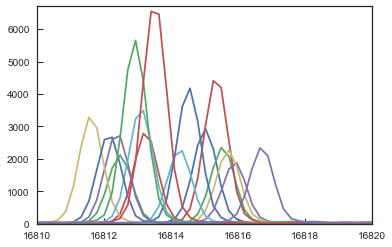

In [56]:
for i in range(visit):
    spectest3 = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[i+2]
    plt.plot(Lambda,spectest3)
plt.xlim(16810,16820)
plt.ylim(0,6700)

(500, 1200)

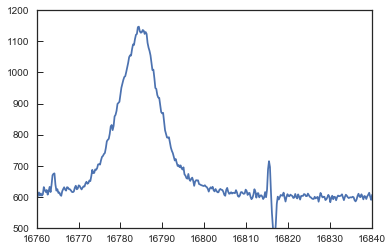

In [65]:
for i in range(visit):
    spectest4 = 0
    spectest3 = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[i+2]
    spectest4 = spectest4+spectest3
spectest4 = spectest4/visit
spectrum = spec - spectest4
#plt.plot(Lambda,spectest4+600)
plt.plot(Lambda,spectrum)
plt.xlim(16760,16840)
plt.ylim(500,1200)

In [124]:
c = 299792
n = 11
rydberg = 1.0973731568539*(10**7)
electron = 9.10938356*(10**-31)
nucleus = 1.672621898*(10**-27)
fracryd = rydberg/(1+(electron/nucleus))
vacuum = fracryd*((1./16.)-(1./(float(n**2))))
lambda_obs = 1/vacuum
    
calculated_point1 = lambda_obs*(1-((vhelio)/c))
diff2 = (lambda_obs-calculated_point1)*(10**10)
diff2

26.48044490739747

(0, 3000)

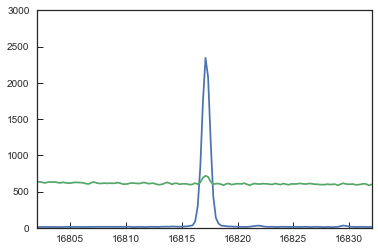

In [115]:
specc = apread.apStar(4586,'2M03434449+3143092',ext=4,header=False)[3]
plt.plot(Lambda+diff2,specc)
plt.plot(Lambda+diff2,spec)
plt.xlim(16802,16832)
plt.ylim(0,3000)

(16802, 16832)

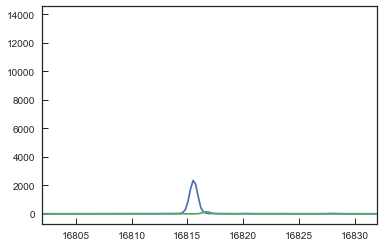

In [98]:
plt.plot(Lambda,specc)
plt.plot(Lambda,spectest4)
plt.xlim(16802,16832)
#plt.ylim(500,800)

(500, 1500)

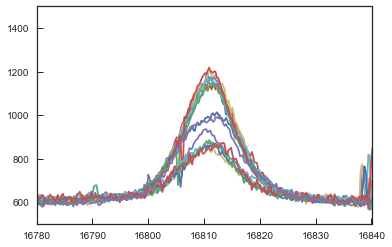

In [126]:
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
nvisits = header[1]['NVISITS']
for i in range(nvisits):
    specn = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[i+2]
    plt.plot(Lambda+diff2,specn)
plt.xlim(16780,16840)
plt.ylim(500,1500)

In [129]:
Lambda

array([ 15100.80154164,  15101.01016837,  15101.21879797, ...,
        16999.33764336,  16999.57249951,  16999.80735891])

In [130]:
Lambda+diff2

array([ 15127.28198655,  15127.49061327,  15127.69924288, ...,
        17025.81808827,  17026.05294442,  17026.28780381])

(500, 1200)

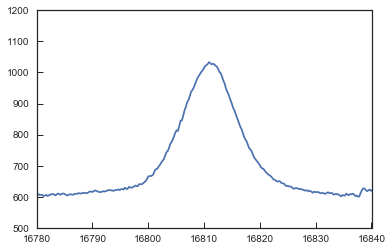

In [135]:
header = apread.apStar(4586,'2M03434449+3143092',ext=0,header=True)
nvisits = header[1]['NVISITS']
alpha = 0
for i in range(nvisits):
    specn = apread.apStar(4586,'2M03434449+3143092',ext=1,header=False)[i+2]
    alpha = alpha + specn
plt.plot(Lambda+diff2,alpha/nvisits)
plt.xlim(16780,16840)
plt.ylim(500,1200)

In [16]:
def find_nearest(array,value):
    index = (np.abs(array-value)).argmin()
    #return array[index]
    return index

In [93]:
def Brackett_EqW_Plot(loc_id, two_massid,number,left_limit,right_limit,bottom_limit,top_limit):
    spec_header = apread.apStar(loc_id, two_massid,ext=0,header=True)
    
    nvisits = spec_header[1]['NVISITS']
    n=number
    #calculate the emission line in a vacuum
    vhelio = spec_header[1]['VHELIO']
    doppler = spec_header[1]['VRAD1']
    bc1 = spec_header[1]['BC1']
    
    
    if nvisits == 1:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)
    else:
        spec1 = apread.apStar(loc_id, two_massid,ext=1,header=False)[3]

    c = 299792
    rydberg = 1.0973731568539*(10**7)
    electron = 9.10938356*(10**-31)
    nucleus = 1.672621898*(10**-27)
    fracryd = rydberg/(1+(electron/nucleus))
    vacuum = fracryd*((1./16.)-(1./(float(n**2))))
    lambda_obs = 1/vacuum
    #calculated_point1 = lambda_obs*((1-(vhelio/c))/(1-(doppler/c)))
    #calculated_point1 = lambda_obs*(1-(bc1/c))
    #calculated_point1 = lambda_obs*(1-(vhelio/c))
    calculated_point1 = lambda_obs*(1-((vhelio)/c))
    diff2 = (lambda_obs-calculated_point1)*(10**10)
    calculated_point2 = calculated_point1*(10**10)
    
    
    
    centerline = find_nearest((Lambda+diff2),(lambda_obs*(10**10)))
    
    
        
    L1 = centerline - 240
    L2 = centerline - 150
    R1 = centerline + 150
    R2 = centerline + 240
    Lwindow = centerline - 160
    Rwindow = centerline + 160
    
    #Calculate Fc
    lsum= np.sum(spec1[L1:L2])/ len(spec1[L1:L2])
    rsum = np.sum(spec1[R1:R2])/len(spec1[R1:R2])
    Fc= (lsum+rsum)/2
    
    #Calculate Equivalent Width
    EqW=0
    for i in range(L2,R1):
        summ=(Fc*(Lambda[i+1]-Lambda[i]))-((1./2.)*(Lambda[i+1]-Lambda[i])*(spec1[i+1]+spec1[i]))
        EqW = EqW + summ
    EqW = abs(EqW/Fc)
    upper = Lambda[centerline]+(EqW/2)
    lower = Lambda[centerline]-(EqW/2)
    
    #Plot averaged spectrum with EqW
    fig,ax = plt.subplots(figsize=(16,8))
    plt.plot((Lambda+diff2),spec1,linewidth=2.5,label='Shifted')
    plt.plot(Lambda,spec1,linewidth=2.5,label='Unshifted')
    plt.axhline(y=Fc,ls='dashed',color='black')
    plt.axvline(x=Lambda[centerline]+diff2,ls='dashed',color='r',label='Rest Emission')
    plt.axvline(calculated_point2,ls=':',color='r',label='Star Emission')
    
    plt.axvline(Lambda[L1]+diff2,linewidth = 2,ls = 'solid', color = 'green')
    plt.axvline(Lambda[L2]+diff2,linewidth = 2,ls = 'solid', color = 'green')
    plt.axvline(Lambda[R1]+diff2,linewidth = 2,ls = 'solid', color = 'green')
    plt.axvline(Lambda[R2]+diff2,linewidth = 2,ls = 'solid', color = 'green')
    
    
    plt.legend(loc=1,prop={'size':18})
    plt.xlabel('Wavelength'+' '+'('+ r'$\AA$'+')', fontsize=24)
    plt.ylabel('Flux (erg s' + r'$^{-1}$'+' cm'+r'$^{-2}$' + r'$\AA^{-1}$'+')', fontsize=24)
    plt.xlim(left_limit,right_limit)
    plt.ylim(bottom_limit,top_limit)
    
    ax.tick_params(axis='both', labelsize=20)

    print(vhelio)